<a href="https://colab.research.google.com/github/IlyaGolovin/Random-Forest-project/blob/master/Random_Forest_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Micro-credentials classes/Random Forest Project4/DATA/diabetic_data.csv")

In [3]:
df.head()

encounter_id  patient_nbr             race  ... change diabetesMed readmitted
0       2278392      8222157        Caucasian  ...     No          No         NO
1        149190     55629189        Caucasian  ...     Ch         Yes        >30
2         64410     86047875  AfricanAmerican  ...     No         Yes         NO
3        500364     82442376        Caucasian  ...     Ch         Yes         NO
4         16680     42519267        Caucasian  ...     Ch         Yes         NO

[5 rows x 50 columns]

In [4]:
df= df.drop(columns=['encounter_id','patient_nbr','weight','admission_type_id','discharge_disposition_id','admission_source_id','payer_code','medical_specialty','number_outpatient','number_inpatient','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',])

In [5]:
df= df.drop(columns=['gender','race','num_medications','number_emergency','diag_1','diag_2','diag_3','insulin','metformin-rosiglitazone','metformin-pioglitazone','change','readmitted','num_lab_procedures','num_procedures'])

In [6]:
df.head()

age  time_in_hospital  number_diagnoses diabetesMed
0   [0-10)                 1                 1          No
1  [10-20)                 3                 9         Yes
2  [20-30)                 2                 6         Yes
3  [30-40)                 2                 7         Yes
4  [40-50)                 1                 5         Yes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   age               101766 non-null  object
 1   time_in_hospital  101766 non-null  int64 
 2   number_diagnoses  101766 non-null  int64 
 3   diabetesMed       101766 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [8]:
v1=lambda x:int(x[4:-1])

In [9]:
df.age=df.age.apply(v1)

In [10]:
df.age.dtype

dtype('int64')

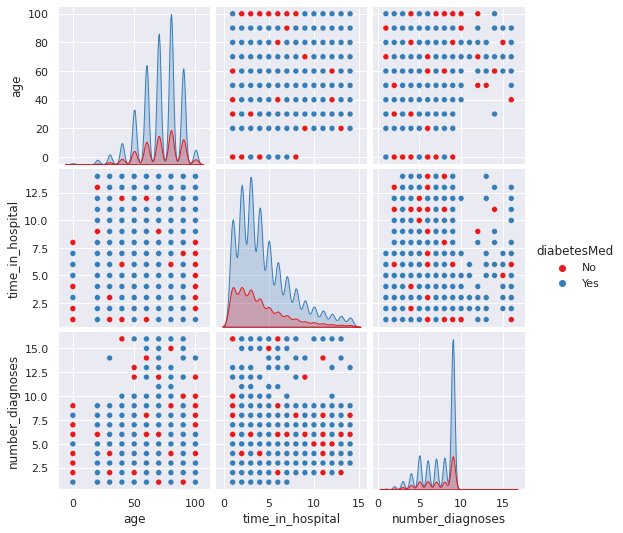

In [11]:
sns.pairplot(df,hue='diabetesMed',palette='Set1')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop('diabetesMed', axis=1)
y = df['diabetesMed']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.28      0.00      0.01      7024
         Yes       0.77      1.00      0.87     23506

    accuracy                           0.77     30530
   macro avg       0.52      0.50      0.44     30530
weighted avg       0.66      0.77      0.67     30530



In [22]:
print(confusion_matrix(y_test,predictions))

[[   31  6993]
 [   81 23425]]


In [23]:
from  IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['time_in_hospital', 'number_diagnoses', 'diabetesMed']

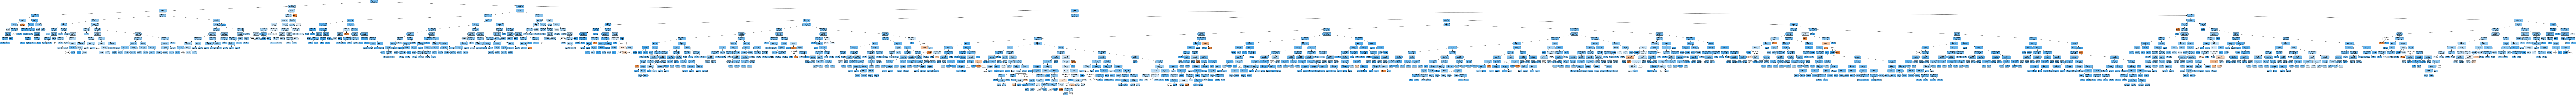

In [24]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
rfc_pred = rfc.predict(X_test)

In [27]:
print(confusion_matrix(y_test,rfc_pred))

[[   18  7006]
 [   45 23461]]


In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

          No       0.29      0.00      0.01      7024
         Yes       0.77      1.00      0.87     23506

    accuracy                           0.77     30530
   macro avg       0.53      0.50      0.44     30530
weighted avg       0.66      0.77      0.67     30530

